Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Creating dataset frame from data if it does not exists

In [ ]:
file_exists = False
try:
  file_exists = True
  dataset = pd.read_csv('spam_detection.csv')
except FileNotFoundError:
  file_exists = False
  dataset = pd.read_csv('spam_detection.csv', encoding='latin-1')
  dataset.columns = ['label', 'text']
  dataset['BinaryLabel'] = dataset['label'].map({'ham': 0, 'spam': 1})
print(file_exists)

True


EDA

In [ ]:
print(dataset.head())

  label                                               text
0  spam  Win a $500 gift card! Click the link to claim ...
1   ham  Hey you free tonight? Wanna grab some food aro...
2  spam  Exclusive deal! Get 50% off on luxury watches....
3   ham  Reminder: Dentist appointment tomorrow at 2 PM...
4  spam  Congrats! You’ve been selected for a free iPho...


In [ ]:
print(dataset.columns)

Index(['label', 'text'], dtype='object')


In [ ]:
# checking if any row has null value
print(dataset.isnull().sum())

label    0
text     0
dtype: int64


In [ ]:
print(dataset['label'].value_counts())

label
ham     4959
spam    1013
Name: count, dtype: int64


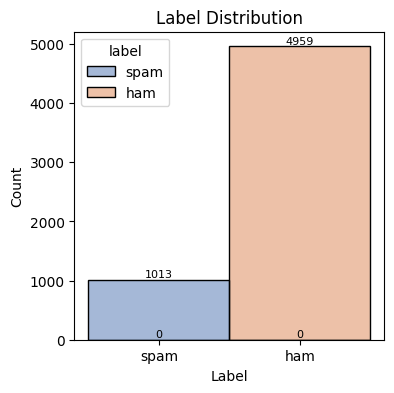

In [ ]:
plt.figure(figsize=(4, 4))
ax = sns.histplot(data=dataset, x='label', discrete=True, hue='label', palette='deep')

for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height + 0.5,
        int(height),
        ha='center',
        va='bottom',
        fontsize=8
    )
ax.set_ylabel('Count')
ax.set_xlabel('Label')
plt.title('Label Distribution')
plt.show()

Save Modified data to file in csv format

In [ ]:
if not file_exists:
  dataset.to_csv('spam_data.csv', index=False, encoding='utf-8')

Saving dataset in fasttext format for further processing

In [ ]:
dataset['ft_label'] = '__label__' + dataset['label']
with open('fasttext_data.txt', 'w', encoding='utf-8') as fast_text_file:
    for label, text in zip(dataset['ft_label'], dataset['text']):
        fast_text_file.write(f"{label} {text.strip()}\n")

Save raw SMS text (no labels) to train embeddings

In [ ]:
with open("corpus.txt", "w", encoding="utf-8") as fasttext_text_file:
    for line in dataset['text']:
        fasttext_text_file.write(line + '\n')